In [17]:
import os
import shutil
import random

# Original dataset directory structure after extraction
original_dir_tb = r"C:\Users\navee\OneDrive\Desktop\Guvi Projects\Project 5\Dataset\TB Chest X-rays"
original_dir_normal = r"C:\Users\navee\OneDrive\Desktop\Guvi Projects\Project 5\Dataset\Normal Chest X-rays"

target_base = "/content/split_xray_dataset" # Changed to a new directory for the split dataset
classes = ["TB", "Normal"]
split_ratio = {"train": 0.8, "val": 0.1, "test": 0.1}

random.seed(42)

# Create folders in the target_base directory
for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(target_base, split, cls), exist_ok=True)

# Split and copy images
for cls in classes:
    if cls == "TB":
        src_path = original_dir_tb
    elif cls == "Normal":
        src_path = original_dir_normal
    else:
        continue # Skip if class is not TB or Normal

    if not os.path.isdir(src_path): # Check if the source path is a directory
        print(f"Source directory not found for class {cls}: {src_path}")
        continue

    images = os.listdir(src_path)
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratio["train"] * total)
    val_end = train_end + int(split_ratio["val"] * total)

    data_splits = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split, split_images in data_splits.items():
        for img in split_images:
            src = os.path.join(src_path, img)
            dst = os.path.join(target_base, split, cls, img)
            if os.path.isfile(src): # Check if the item is a file before copying
                shutil.copy(src, dst)

print("✅ Dataset split into train, val, and test.")

✅ Dataset split into train, val, and test.


In [13]:
!pip install opencv-python

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.0 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.1/39.0 MB 1.1 MB/s eta 0:00:38
   ---------------------------------------- 0.1/39.0 MB 944.1 kB/s eta 0:00:42
   ---------------------------------------- 0.2/39.0 MB 807.1 kB/s eta 0:00:49
   ---------------------------------------- 0.2/39.0 MB 784.3 kB/s eta 0:00:50
   ---------------------------------------- 0.2/39.0 MB 724.0 kB/s eta 0:00:54
   ---------------------------------------- 0.2/39.0 MB 719.7 kB/s eta 0:00:54
   ---


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\navee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
!pip install tqdm

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.7 kB 217.9 kB/s eta 0:00:01
     ------------- ------------------------ 20.5/57.7 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 338.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.5 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\navee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import os
import cv2
from tqdm import tqdm

# Resize config
IMG_SIZE = (224, 224)
data_dir = "/content/split_xray_dataset" # Updated to the new split dataset directory
splits = ["train", "val", "test"]
classes = ["Normal", "TB"] # Updated to include both classes

def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: cv2.imread returned None for {image_path}")
            return None
        # Add a check for image shape before resizing
        if img.shape[0] == 0 or img.shape[1] == 0:
             print(f"Warning: Image {image_path} has invalid dimensions {img.shape}")
             return None
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0  # Normalize
        return img
    except cv2.error as e:
        print(f"Error processing image {image_path}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing image {image_path}: {e}")
        return None


# Check for corrupt or unreadable images
for split in splits:
    for cls in classes:
        folder = os.path.join(data_dir, split, cls)
        # Check if the folder exists before listing its contents
        if os.path.isdir(folder):
            for img_file in tqdm(os.listdir(folder), desc=f"{split}/{cls}"):
                path = os.path.join(folder, img_file)
                # Check if the item is a file before attempting to process
                if os.path.isfile(path):
                    img = preprocess_image(path)
                    if img is None:
                        print(f"❌ Corrupt or unreadable: {path}")
                        os.remove(path)
        else:
            print(f"Warning: Directory not found for {split}/{cls}: {folder}")

test/TB: 100%|██████████| 250/250 [00:00<00:00, 1201.81it/s]


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\navee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\navee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------- -------------------------- 102.4/294.9 kB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.3 MB 3.4 MB/s eta 0:00:04
   ---------------------------------------- 0.1/11.3 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.3 MB 1.8 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.3 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.3 MB 1.5 MB/s eta 0:00:08
  

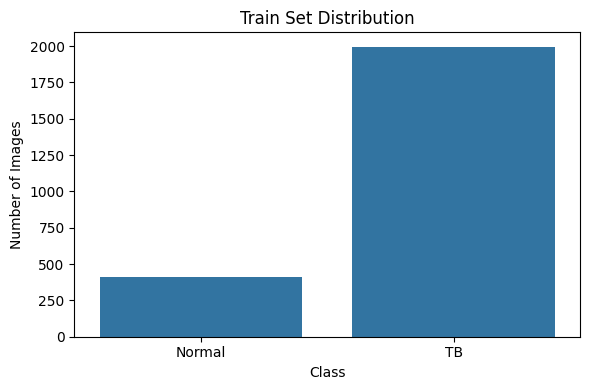

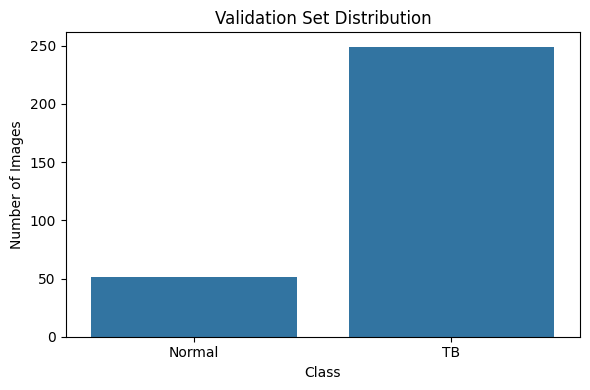

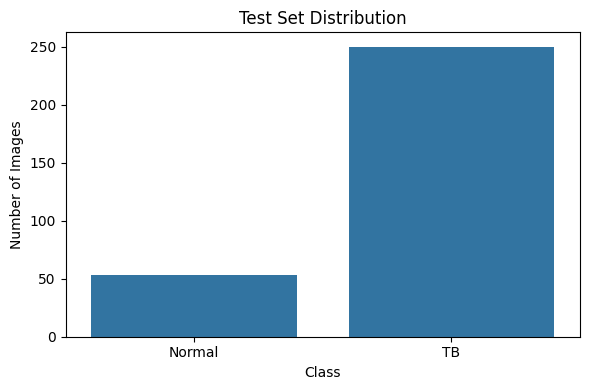

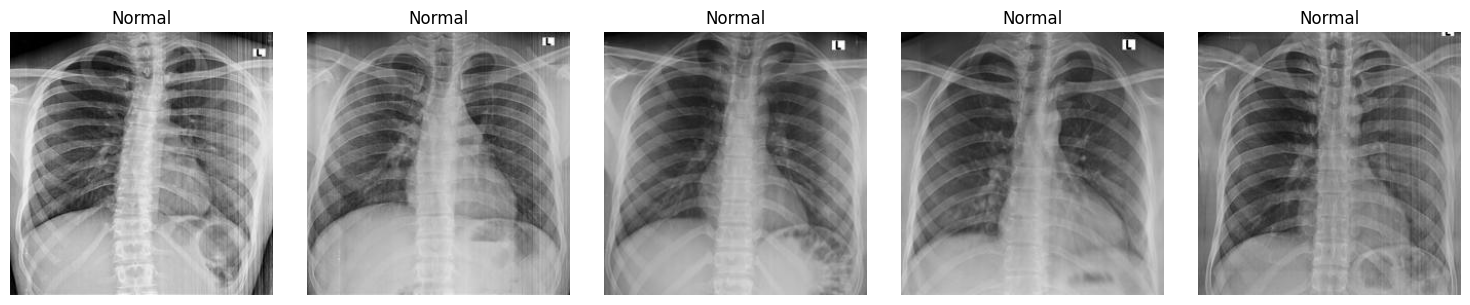

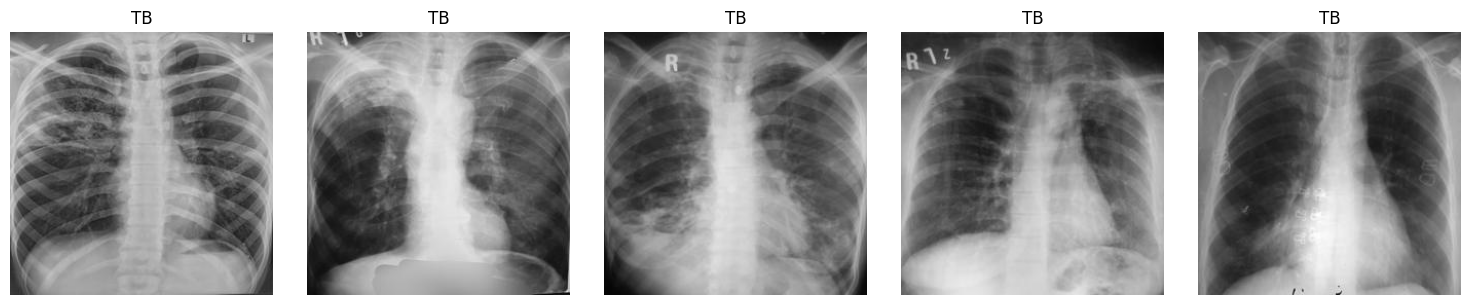

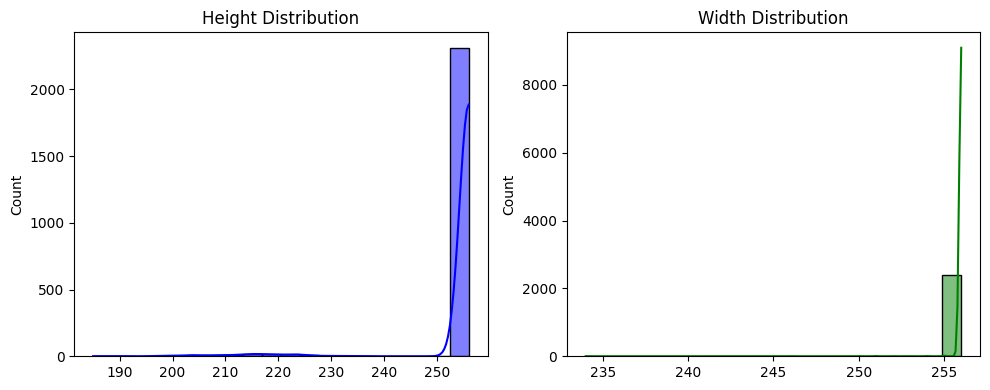

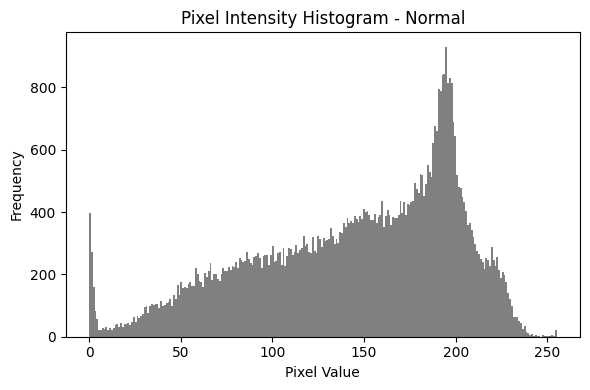

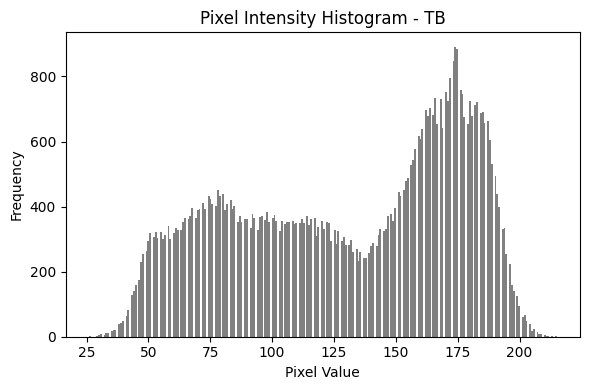

In [21]:
%pip install matplotlib
%pip install seaborn

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Set your train, val, test directories
train_dir = '/content/split_xray_dataset/train'
val_dir = '/content/split_xray_dataset/val'
test_dir = '/content/split_xray_dataset/test'

# Function to plot class distribution
def plot_class_distribution(data_dir, title='Class Distribution'):
    classes = []
    counts = []

    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            classes.append(cls)
            counts.append(len(os.listdir(cls_path)))

    plt.figure(figsize=(6,4))
    sns.barplot(x=classes, y=counts)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

# Function to display sample images
def show_sample_images(data_dir, class_name, n=5):
    path = os.path.join(data_dir, class_name)
    images = os.listdir(path)[:n]
    plt.figure(figsize=(15,3))

    for i, img_name in enumerate(images):
        img = cv2.imread(os.path.join(path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot image size distribution
def image_shape_distribution(data_dir):
    shapes = []
    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        for img_file in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                shapes.append(img.shape[:2])  # height, width

    if shapes:
        heights, widths = zip(*shapes)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(heights, bins=20, kde=True, color='blue')
        plt.title("Height Distribution")
        plt.subplot(1, 2, 2)
        sns.histplot(widths, bins=20, kde=True, color='green')
        plt.title("Width Distribution")
        plt.tight_layout()
        plt.show()

# Function to show pixel intensity distribution
def pixel_intensity_histogram(data_dir, class_name):
    path = os.path.join(data_dir, class_name)
    img_name = os.listdir(path)[0]
    img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(6, 4))
    plt.hist(img.ravel(), bins=256, color='gray')
    plt.title(f'Pixel Intensity Histogram - {class_name}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Run EDA
plot_class_distribution(train_dir, title='Train Set Distribution')
plot_class_distribution(val_dir, title='Validation Set Distribution')
plot_class_distribution(test_dir, title='Test Set Distribution')

show_sample_images(train_dir, 'Normal')
show_sample_images(train_dir, 'TB')

image_shape_distribution(train_dir)

pixel_intensity_histogram(train_dir, 'Normal')
pixel_intensity_histogram(train_dir, 'TB')


In [ ]:
%pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# Paths
train_dir = '/content/split_xray_dataset/train'
val_dir = '/content/split_xray_dataset/val'
test_dir = '/content/split_xray_dataset/test'

# Check if required directories exist
if not os.path.exists(os.path.join(train_dir, 'Normal')):
    print("⚠️ Warning: Directory for train/Normal is empty or not found for pixel distribution plot.")

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_gen = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_gen = val_test_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_gen = val_test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

# Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base

# Add classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
model_ckpt = ModelCheckpoint("best_tb_model.h5", save_best_only=True, monitor='val_accuracy')

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, model_ckpt]
)

# Evaluate
print("\nEvaluating on test set...")
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc:.4f}")

# Classification report
y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = test_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Normal', 'TB']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Plotting training curves
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_plot.png')
    plt.show()

plot_history(history)


^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'tensorflow'

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 816.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB 991.0 kB/s eta 0:06:20
   ---------------------------------------- 0.1/375.9 MB 1.1 MB/s eta 0:05:58
   ---------------------------------------- 0.1/375.9 MB 1.0 MB/s eta 0:06:04
   ---------------------------------------- 0.2/375.9 MB 1.1 MB/s eta 0:05:37
   ---------------------------------------- 0.3/375.9 MB 1.2 MB/s eta 0:05:20
   ---------------------------------------- 0.3/375.9 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.5/375.9 MB 1.4 MB/s eta 0:04:27
   ---------------------------------------- 0.5/375.9 MB 1.5 MB/s eta 0:04:17
   ---

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.re

In [35]:
%pip install tensorflow
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Paths
data_dir = '/content/split_xray_dataset'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')
model_save_path = 'models'
os.makedirs(model_save_path, exist_ok=True)

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_gen = val_test_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_gen = val_test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

def build_model(base_model_fn, model_name):
    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_evaluate_model(model_fn, model_name):
    print(f"\nTraining {model_name} model...")
    model = build_model(model_fn, model_name)
    ckpt_path = os.path.join(model_save_path, f'{model_name}_best.h5')
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(ckpt_path, monitor='val_accuracy', save_best_only=True)
    ]
    history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, callbacks=callbacks)

    # Evaluate
    print(f"\nEvaluating {model_name} on test data...")
    test_loss, test_acc = model.evaluate(test_gen)
    print(f"Test Accuracy: {test_acc:.4f}")

    y_pred = model.predict(test_gen)
    y_pred_cls = (y_pred > 0.5).astype(int)
    y_true = test_gen.classes
    print(classification_report(y_true, y_pred_cls, target_names=['Normal', 'TB']))
    print(confusion_matrix(y_true, y_pred_cls))
    auc = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC Score: {auc:.4f}\n")
    return model_name, test_acc, auc

def main():
    results = []
    results.append(train_evaluate_model(ResNet50, 'ResNet50'))
    results.append(train_evaluate_model(VGG16, 'VGG16'))
    results.append(train_evaluate_model(EfficientNetB0, 'EfficientNetB0'))

    print("\nModel Comparison:")
    for name, acc, auc in results:
        print(f"{name}: Accuracy = {acc:.4f}, AUC = {auc:.4f}")

if __name__ == '__main__':
    main()


  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\navee\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\navee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# streamlit_app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficient_preprocess

# Load models (adjust paths as needed)
resnet_model = tf.keras.models.load_model("models/resnet50_tb.h5")
vgg_model = tf.keras.models.load_model("models/vgg16_tb.h5")
efficient_model = tf.keras.models.load_model("models/efficientnetb0_tb.h5")

def predict_image(model, image, preprocess_func):
    img = image.resize((224, 224))
    img_array = np.array(img.convert("RGB"))
    img_array = preprocess_func(img_array.astype(np.float32))
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return prediction[0][0]

# Streamlit UI
st.title("🩺 Tuberculosis Detection from Chest X-ray")

uploaded_file = st.file_uploader("Upload a Chest X-ray Image", type=["jpg", "jpeg", "png"])

model_choice = st.selectbox("Choose a Model", ["ResNet50", "VGG16", "EfficientNetB0"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded X-ray", use_column_width=True)

    if st.button("Predict TB"):
        if model_choice == "ResNet50":
            prediction = predict_image(resnet_model, image, resnet_preprocess)
        elif model_choice == "VGG16":
            prediction = predict_image(vgg_model, image, vgg_preprocess)
        else:
            prediction = predict_image(efficient_model, image, efficient_preprocess)

        label = "Tuberculosis Detected ✅" if prediction > 0.5 else "Normal ✅"
        st.subheader(f"Prediction: {label} ({prediction:.2f})")


In [12]:
# Tuberculosis Detection Streamlit App
!pip install streamlit
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import os

# Load model
model_path = "models/best_tb_model.h5"
# Check if the model file exists before loading
if not os.path.exists(model_path):
    st.error(f"Model file not found at {model_path}")
else:
    model = load_model(model_path)

    # Class labels
    class_names = ['Normal', 'Tuberculosis']

    # Streamlit app layout
    st.set_page_config(page_title="TB Detection", layout="centered")
    st.title("Tuberculosis Detection from Chest X-rays")
    st.write("Upload a chest X-ray image and the model will predict whether it shows signs of Tuberculosis or not.")

    # Upload image
    uploaded_file = st.file_uploader("Choose a chest X-ray image", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display image
        img = Image.open(uploaded_file).convert('RGB')
        st.image(img, caption='Uploaded Image', use_column_width=True)

        # Preprocess image
        img_resized = img.resize((224, 224))
        img_array = image.img_to_array(img_resized) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)[0][0]
        class_idx = int(prediction > 0.5)
        result = class_names[class_idx]
        confidence = prediction if class_idx == 1 else 1 - prediction

        st.subheader("Prediction Result:")
        st.write(f"**Class:** {result}")
        st.write(f"**Confidence:** {confidence:.2f}")

        if result == 'Tuberculosis':
            st.error("⚠️ The X-ray image may indicate signs of Tuberculosis. Please consult a medical professional.")
        else:
            st.success("✅ The X-ray image appears to be normal.")

2025-08-02 18:27:42.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:27:42.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:27:42.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
